In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import zscore

### kiểm tra dữ liệu

In [5]:
data = pd.read_csv('Automobile_data.xls')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# kiểm tra dữ liệu thiếu

In [6]:
missing_data = data.isnull().sum()
print("Giá trị thiếu:\n", missing_data)

Giá trị thiếu:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


- chuyển dữ liệu ? thành NaN để xử lý dữ liệu thiếu

In [7]:
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### kiểm tra outlier và xử lý outlier

In [8]:
data_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'engine-size', 'bore', 'stroke', 'compression-ratio',
                   'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

for col in data_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
#kiểm tra outliers

outliers = {}

for col in data_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

# Chuyển outliers sang DataFrame để hiển thị
outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Số lượng outliers'])
outliers_df

,Số lượng outliers
wheel-base,2
length,5
width,7
height,0
curb-weight,1
engine-size,2
bore,0
stroke,16
compression-ratio,25
horsepower,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\3167293555.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data[data_cols].values, labels=data_cols, showfliers=True)


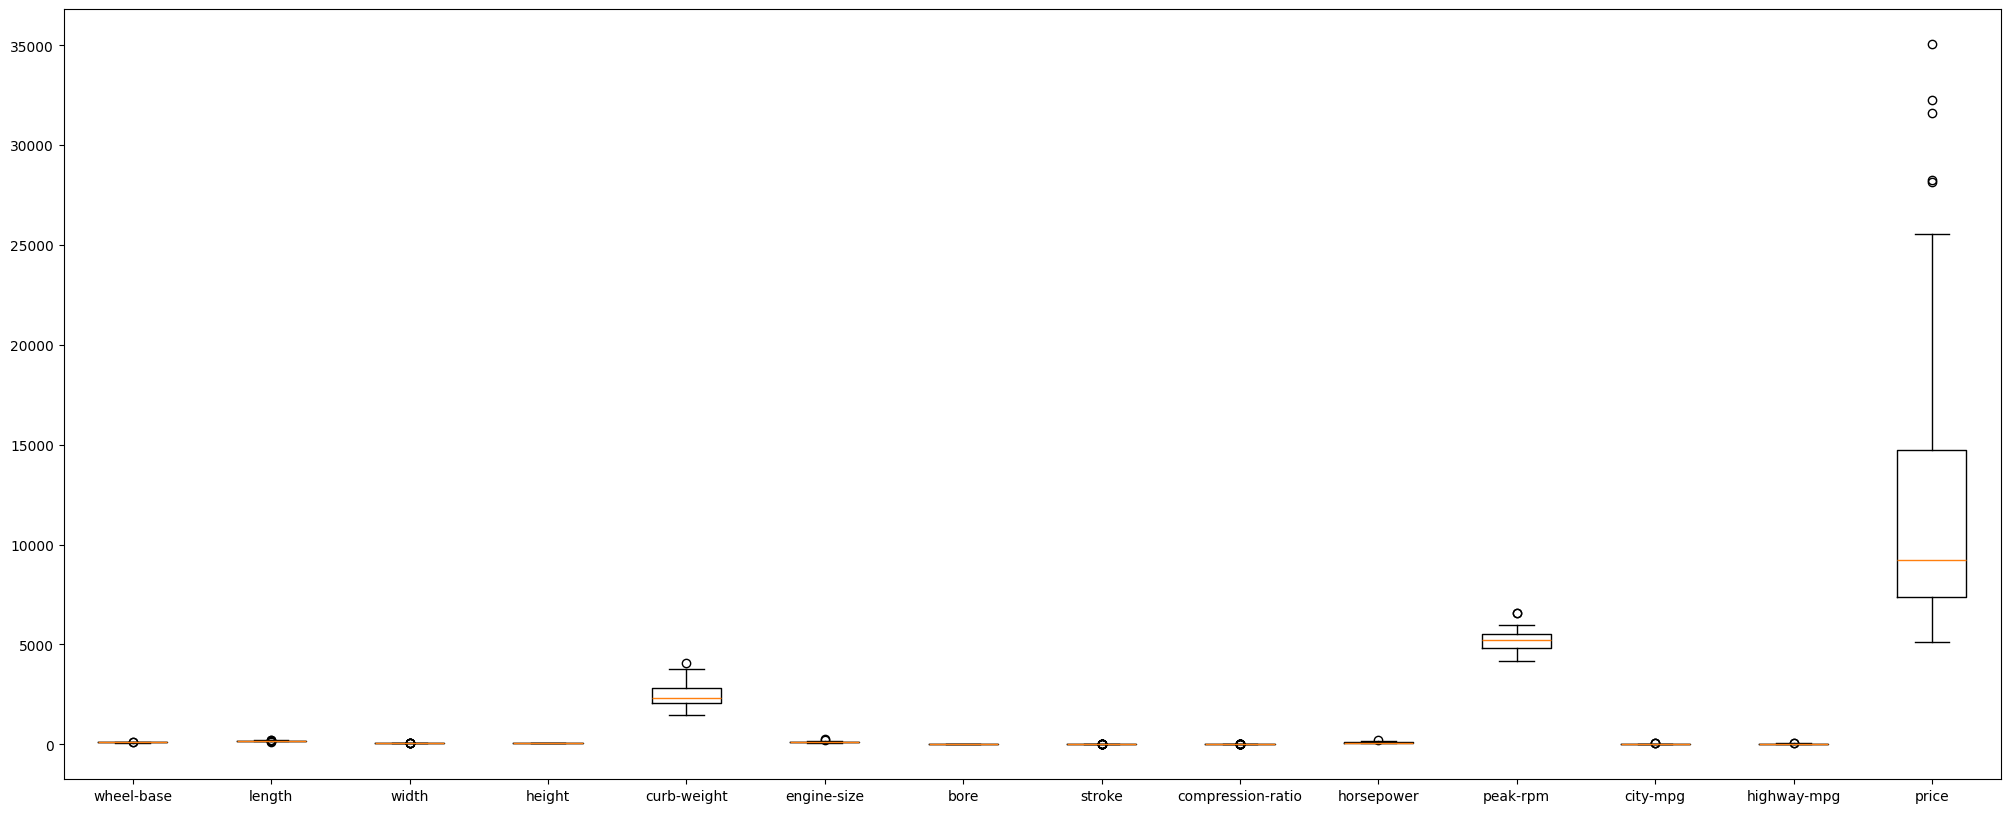

In [9]:
#trực quan bằng biểu đồ 
plt.figure(figsize=(25, 10))
plt.boxplot(data[data_cols].values, labels=data_cols, showfliers=True)
plt.show()


- xử lý outlier

In [10]:
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Kiểm tra lại số lượng outliers sau khi xử lý
outliers_after = {}

for col in data_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_after[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

outliers_df_after = pd.DataFrame.from_dict(outliers_after, orient='index', columns=['Outliers Sau Xử Lý'])
outliers_df_after

,Outliers Sau Xử Lý
wheel-base,6
length,3
width,3
height,0
curb-weight,0
engine-size,7
bore,0
stroke,4
compression-ratio,22
horsepower,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\2576063285.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col].dropna() for col in data_cols], labels=data_cols, showfliers=True)


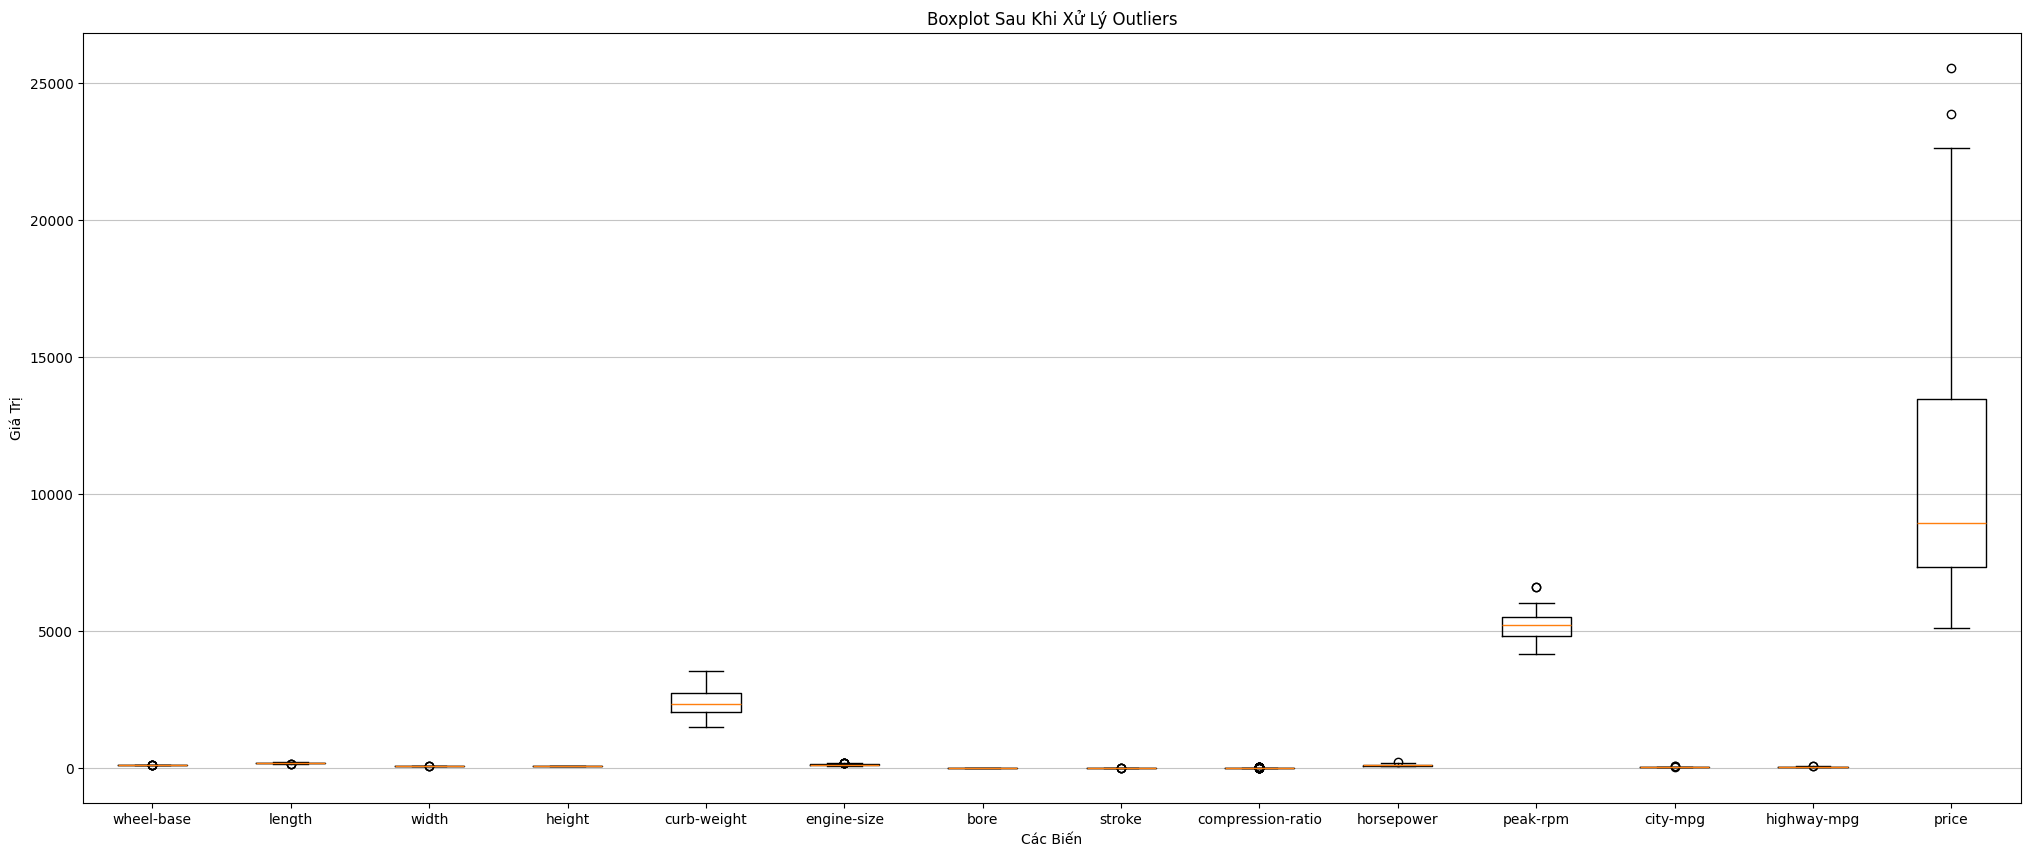

In [11]:
#biểu đồ sau khi xử lý outlier
plt.figure(figsize=(25, 10))
plt.boxplot([data[col].dropna() for col in data_cols], labels=data_cols, showfliers=True)
plt.title('Boxplot Sau Khi Xử Lý Outliers')
plt.xlabel('Các Biến')
plt.ylabel('Giá Trị')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.decomposition import PCA

### xử lý dummy

- kiểm tra đa cộng tuyến

In [13]:
categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                    'body-style', 'drive-wheels', 'engine-location',
                    'engine-type', 'num-of-cylinders', 'fuel-system']

# xử lý dumies bằng one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Kiểm tra đa cộng tuyến bằng VIF
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']



- Chuẩn hóa dữ liệu

In [14]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Giảm Chiều Dữ Liệu Bằng PCA:

In [15]:
# Thực hiện PCA
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_pca = pca.fit_transform(X_scaled)

### hiện tượng đa cộng tuyến

In [16]:
# Tính VIF bằng hồi quy tuyến tính
vif = []
for i in range(X_scaled.shape[1]):
    X_temp = np.delete(X_scaled, i, axis=1)  # Loại bỏ cột đang xét
    y_temp = X_scaled[:, i]
    
    model = LinearRegression()
    model.fit(X_temp, y_temp)
    r2 = model.score(X_temp, y_temp)
    
    if r2 == 1:
        vif.append(np.inf)  # Tránh chia cho 0
    else:
        vif.append(1 / (1 - r2))

# Đưa vào DataFrame
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": vif
})

print(vif_data)

                  Variable         VIF
0                symboling    7.540149
1        normalized-losses    5.820672
2               wheel-base   19.031032
3                   length   20.292370
4                    width   14.937616
5                   height    8.267539
6              curb-weight   35.136193
7              engine-size   41.770578
8                     bore   16.459930
9                   stroke    8.339359
10       compression-ratio  220.349836
11              horsepower   36.911705
12                peak-rpm    7.601721
13                city-mpg   43.645199
14             highway-mpg   35.494166
15                make_bmw    9.234169
16          make_chevrolet    7.526625
17              make_dodge   14.652435
18              make_honda   26.826939
19              make_mazda   18.834768
20      make_mercedes-benz    2.595320
21         make_mitsubishi   17.318103
22             make_nissan   25.693761
23             make_peugot         inf
24           make_plymout

### mô hình hồi quy tuyến tính

In [17]:
# Chia dữ liệu thành tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')


MSE: 5219134.93
R²: 0.74


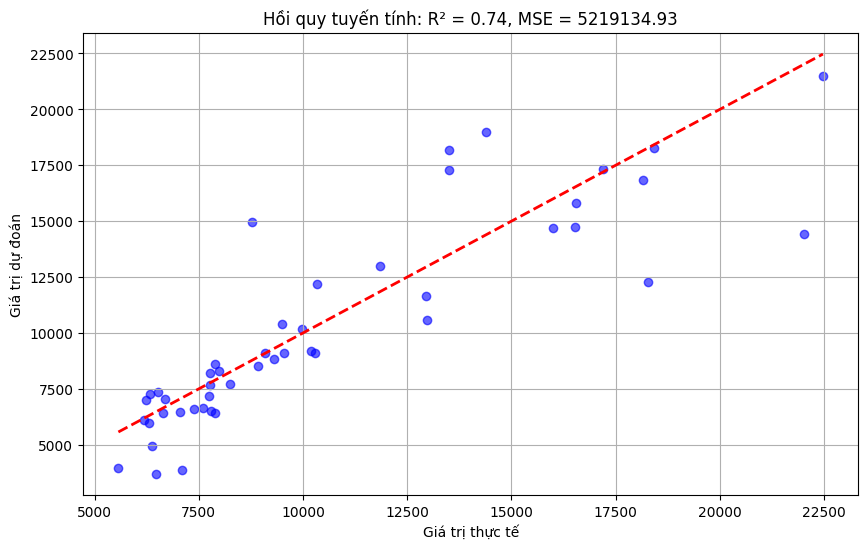

In [18]:
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title(f'Hồi quy tuyến tính: R² = {r2:.2f}, MSE = {mse:.2f}')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid(True)
plt.show()




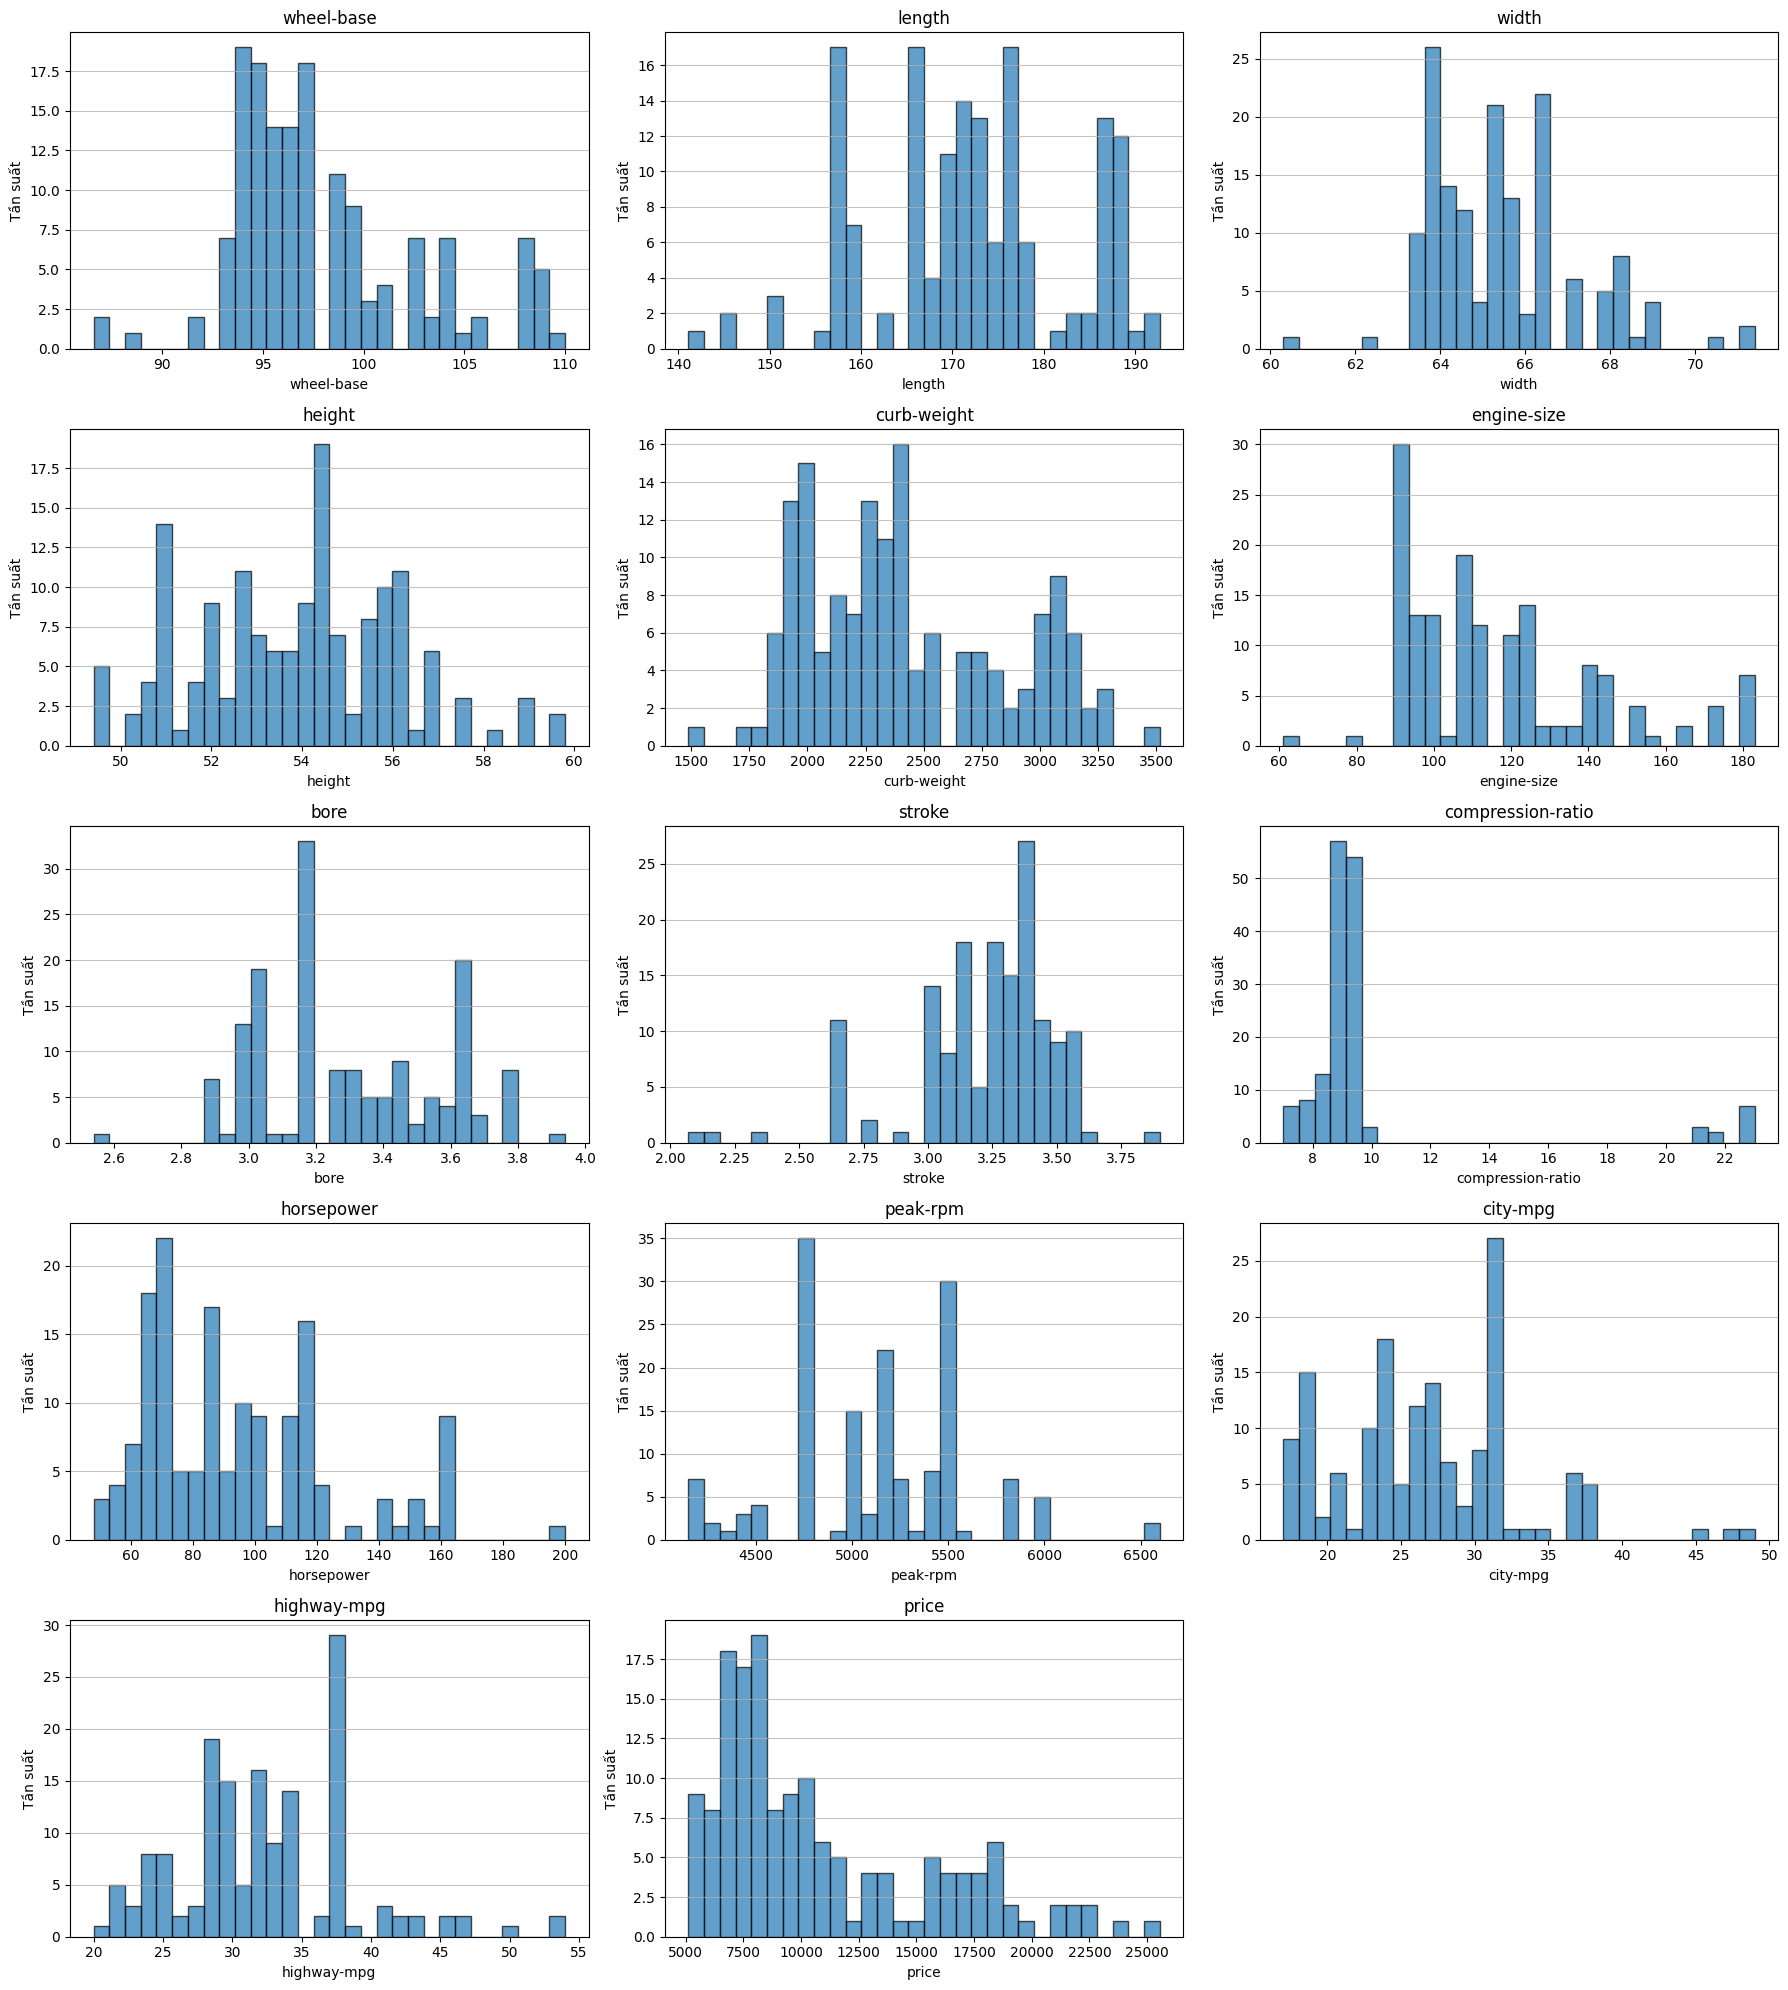

In [19]:
# biểu đồ biến liên tục
plt.figure(figsize=(18, 20))

for i, col in enumerate(data_cols):
    plt.subplot(5, 3, i + 1)
    plt.hist(data[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

In [20]:
# Chọn các cột có kiểu dữ liệu là object (phân loại)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_encoded.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,normalized-losses_83,normalized-losses_85,normalized-losses_87,normalized-losses_89,normalized-losses_90,normalized-losses_91,normalized-losses_93,normalized-losses_94,normalized-losses_95,normalized-losses_98
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,...,False,False,False,False,False,False,False,False,False,False
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,...,False,False,False,False,False,False,False,False,False,False
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,...,False,False,False,False,False,False,False,False,False,False
10,2,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#xử lý các dữ liệu còn lại false
data.replace(False, np.nan, inplace=True)
data.dropna(inplace=True)
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\398167379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(False, np.nan, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\398167379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### biểu đồ phân phối

In [22]:
# def plotPerColumnDistribution(data, nrows=3, ncols=3):
#     """
#     Vẽ biểu đồ phân phối (histogram) cho từng cột trong DataFrame.
    
#     Tham số:
#     - data: DataFrame cần vẽ.
#     - nrows: Số hàng của biểu đồ con.
#     - ncols: Số cột của biểu đồ con.
#     """
#     nrows = (len(data.columns) // ncols) + 1

#     plt.figure(figsize=(ncols * 5, nrows * 4))
#     total_cols = data.shape[1]  # Tổng số cột
#     for i, col in enumerate(data.columns):
#         plt.subplot(nrows, ncols, i + 1)
#         plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
#         plt.title(f'Phân phối của {col}')
#         plt.xlabel(col)
#         plt.ylabel('Tần suất')
#         plt.grid(axis='y', alpha=0.75)
        
#         # Nếu số cột ít hơn số subplot
#         if i + 1 == total_cols:
#             break

#     plt.tight_layout()
#     plt.show()


In [23]:
# plotPerColumnDistribution(data, 4, 4)

### Ma trận tương quan

- Loại Bỏ Các Cột Không Phải Kiểu Số:

In [24]:
numerical_data = data.select_dtypes(include=[np.number])  # Lọc các cột kiểu số
correlation_matrix = numerical_data.corr()  # Tính toán ma trận tương quan


- Chuyển Đổi Cột Phân Loại Thành Dữ Liệu Số (One-Hot Encoding)

In [25]:
data_encoded = pd.get_dummies(data, drop_first=True)  # Mã hóa one-hot
correlation_matrix = data_encoded.corr()

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
    
correlation_matrix = data.corr()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\387132937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\387132937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13564\387132937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

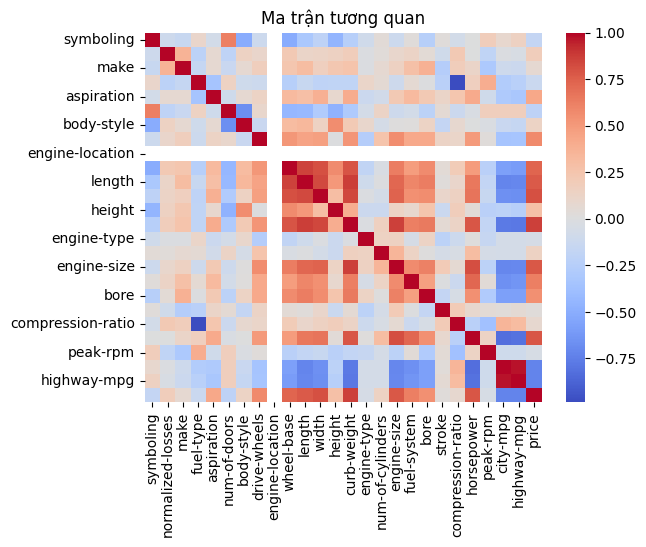

In [27]:
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()


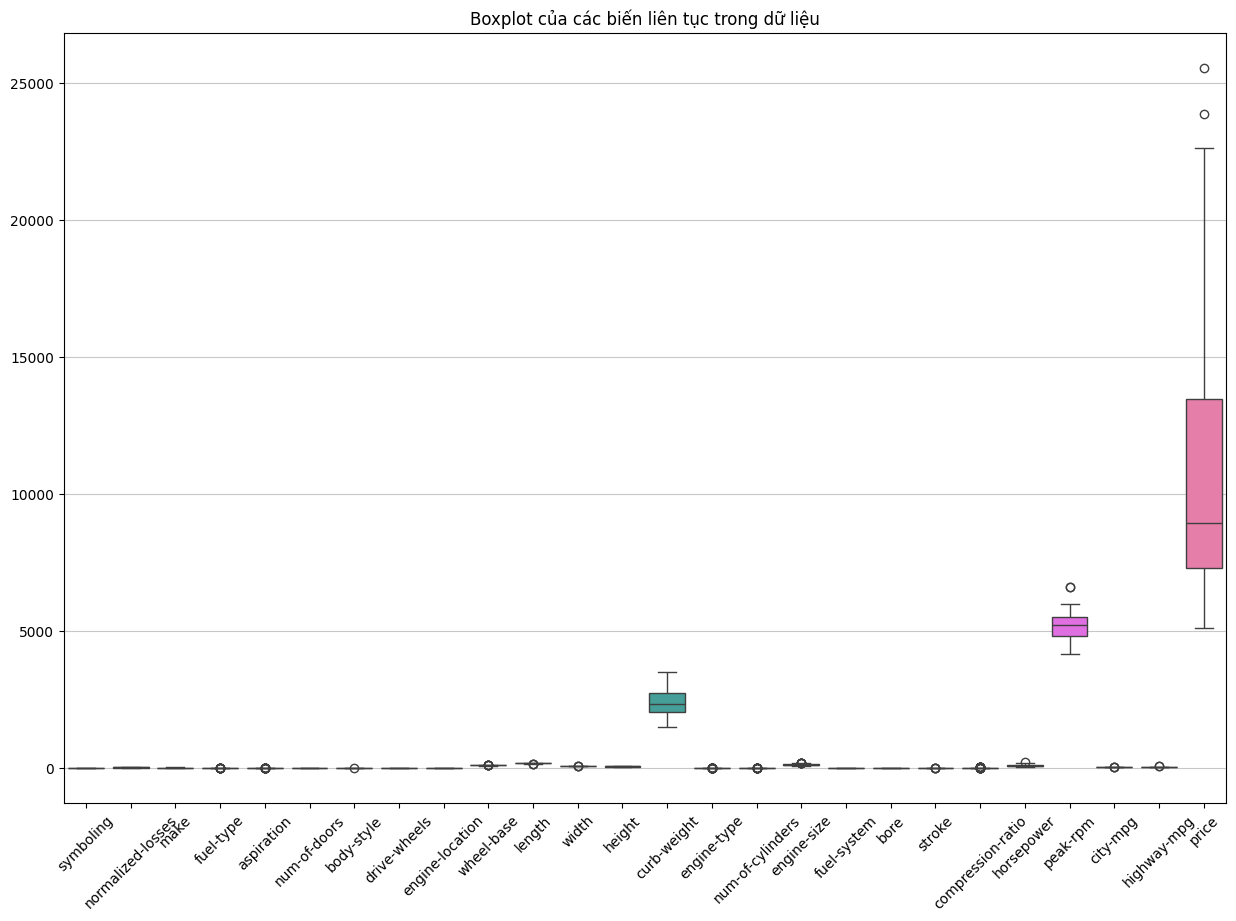

In [28]:
# Vẽ boxplot cho từng cột trong data
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot của các biến liên tục trong dữ liệu')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()


# phân tích dữ liệu
- Kiểm Tra Dữ Liệu:
    - Xác định số lượng cột, dòng, kiểu dữ liệu.
    - Tìm và xử lý giá trị thiếu (NaN), ?, hoặc False.
- Tiền Xử Lý:
    - Chuyển True/False thành 1/0.
    - Thay ? bằng NaN và điền bằng trung bình hoặc loại bỏ.
- Xử Lý Biến Phân Loại:
    - Dùng One-hot encoding để chuyển biến phân loại (text)  thành số.
- Phân Tích Phân Phối và Outliers:
    - Vẽ biểu đồ phân phối để kiểm tra dữ liệu.
    - Phát hiện và loại bỏ outliers bằng IQR.
- Kiểm Tra Đa Cộng Tuyến:
    - Tính VIF (nếu VIF > 10, loại bỏ biến hoặc dùng PCA).
- Xây Dựng Mô Hình:
    - Chia dữ liệu (70% train – 30% test).
- Đánh giá mô hình bằng MSE và R².
- Kết quả là mô hình hoạt động hiệu quả hơn và dữ liệu sạch sẽ, giúp dự đoán chính xác.